In [1]:
import getEPH
import functionsForModels
import make_dummy
import schoolYears
import categorize
import functionsForModels
import createVariables

import pandas as pd
#http://statsmodels.sourceforge.net/devel/examples/generated/example_wls.html
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.iolib.table import (SimpleTable, default_txt_fmt)
np.random.seed(1024)
%matplotlib inline

/home/pipe/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
hog = pd.read_csv('data/cleanDataHouseholdt310.csv')

In [3]:
hog.head()

,CODUSU,NRO_HOGAR,REGION,PONDERA,HomeType,HomeTypeesp,RoomsNumber,FloorMaterial,FloorMaterialesp,RoofMaterial,...,HouseMembers,Memberless10,Membermore10,TotalHouseHoldIncome,DomesticService1,DomesticService2,DomesticService3,DomesticService4,DomesticService5,DomesticService6
0,302468,1,1,1287,2,NaN,2,1,NaN,9,...,2,0,2,4000.0,1,0,2,0,0,0
1,307861,1,1,1674,2,NaN,2,1,NaN,1,...,4,1,3,5800.0,1,2,98,0,0,0
2,308762,1,1,1522,2,NaN,4,1,NaN,9,...,1,0,1,3200.0,1,0,98,0,0,0
3,308278,1,1,1320,2,NaN,3,1,NaN,9,...,2,0,2,10000.0,2,0,96,0,0,0
4,311937,1,1,1281,2,NaN,4,1,NaN,1,...,4,0,4,11000.0,2,4,96,0,0,0


**HomeType IV 1, ** NO CREO QUE SIRVA
Tipo de vivienda ( por observación)
1. = Casa
2. = Departamento
3. = Pieza de inquilinato
4. = Pieza en hotel / pensión
5. = Local no construido para habitación
6. = Otros

**FloorMaterial** SIRVE SACAR TAL COMO ESTA SACAR 9 SE PUEDE HACER PCA CON LAS DE ABAJO
IV3 N(1) Los pisos interiores son principalmente de...
1. = Mosaico / baldosa / madera / cerámica / alfombra
2. = Cemento / ladrillo fijo
3. = Ladrillo suelto / tierra
4. = Otro


** RoofMaterial** SIRVE SACAR TAL COMO ESTA SACAR 9
IV4 N(2) La cubierta exterior del techo es de....
1. = Membrana / cubierta asfáltica
2. = Baldosa / losa sin cubierta
3. = Pizarra / teja
4. = Chapa de metal sin cubierta
5. = Chapa de fibrocemento / plástico
6. = Chapa de cartón
7. = Caña / tabla / paja con barro / paja sola
9. = N/S. Depto en propiedad horizontal

**RoofCoat**
IV5 N(1) ¿El techo tiene cielorraso / revestimiento interior?
1 = Sí
2 = No
    

1    2336
2     366
9       1
Name: RoofCoat, dtype: int64


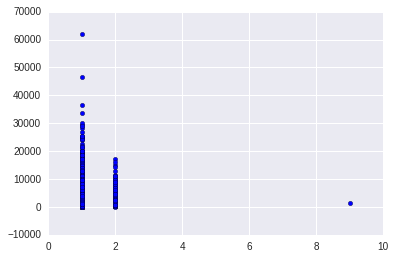

In [18]:
print hog.RoofCoat.value_counts()
plt.scatter(hog.RoofCoat, hog.TotalHouseHoldIncome)

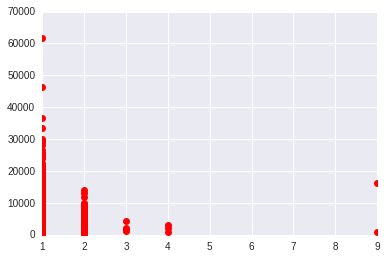